In [6]:
import pandas as pd

# Clean data

In [103]:
data = pd.read_csv('/media/jess/DATA/PhD/cnn_bakeoff2/outputs/model_results.csv')
data['number_of_images'] = data['number_of_images'].astype(float)
data['fold'] = data['fold'].astype(float)
data['mAP'] = data['mAP'].astype(float)
data

,number_of_images,model,fold,class,mAP,augmented
0,10.0,yolov8n,1.0,all,0.243,No
1,10.0,yolov8n,2.0,all,0.420,No
2,10.0,yolov8n,3.0,all,0.914,No
3,10.0,yolov8n,4.0,all,0.944,No
4,10.0,yolov8n,5.0,all,0.995,No
...,...,...,...,...,...,...
295,100.0,yolov8x,1.0,all,0.778,Yes
296,100.0,yolov8x,2.0,all,0.978,Yes
297,100.0,yolov8x,3.0,all,0.959,Yes
298,100.0,yolov8x,4.0,all,0.976,Yes


## Get mean from each model

In [104]:
import numpy as np

data_stats = data.groupby(['augmented', 'number_of_images', 'model']).agg(mean=('mAP', 'mean'), sd=('mAP', 'std')).reset_index()
data_stats

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


# Plots

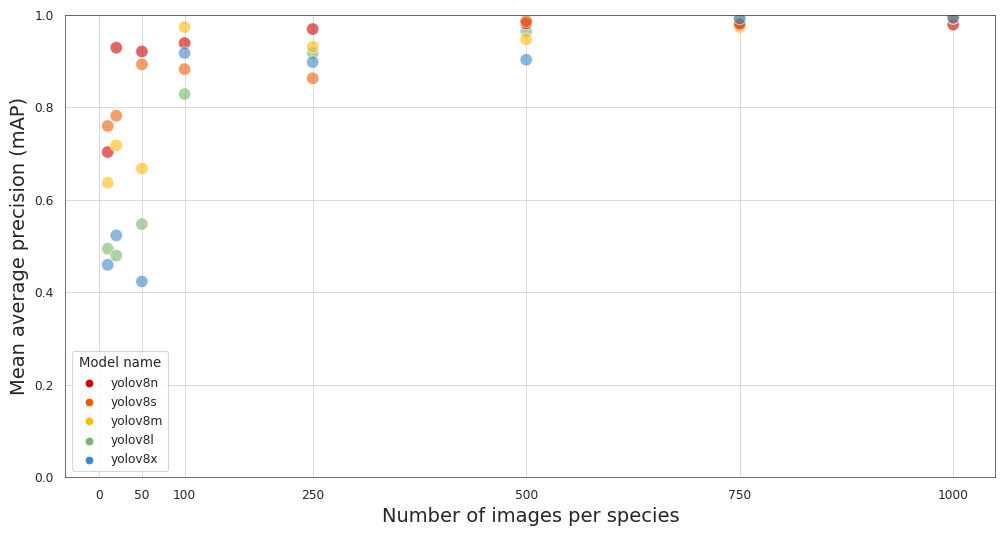

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties

#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#increase figure size
plt.figure(figsize = (12, 6))

#palette
palette = ['#D00000', '#E85D04', '#FFBA08', '#7BB567', '#3F88C5']

#scatter plot
sns.scatterplot(
    data=data_stats,
    x=data_stats['number_of_images'],
    y=data_stats['mean'],
    hue='model',
    hue_order=[
        'yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x'
    ],
    palette=palette,
    s=80,
    alpha=0.6
)

#set limits
plt.ylim(0, 1)

#set axes
plt.xlabel(
    'Number of images per species',
    fontsize = 14
)
plt.ylabel(
    'Mean average precision (mAP)',
    fontsize = 14
)
plt.xticks([0, 50, 100, 250, 500, 750, 1000])

# sns.despine())

#legend settings
plt.legend(
    title='Model name',
    # title_fontsize='x-large',
    # labels=[
    #     'YOLOv8 nano',
    #     'YOLOv8 small',
    #     'YOLOv8 medium',
    #     'YOLOv8 large',
    #     'YOLOv8 X'
    # ],
    # fontsize='large',
    # shadow=True
)

#save plot
# plt.savefig("outputs/map_only.pdf", bbox_inches='tight')
    
#show plot
plt.show()

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns


#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#palette
palette = ['#EC2424', '#3F9FEE']

#x axis tick marks
xticks = [
    10,
    50,
    100,
    250,
    500,
    750,
    1000
]

hue_order = [
    'yolov8n',
    'yolov8s',
    'yolov8m',
    'yolov8l',
    'yolov8x'
]

labels = [
    'YOLOv8 nano',
    'YOLOv8 small',
    'YOLOv8 medium',
    'YOLOv8 large',
    'YOLOv8 X'
]

# Ensure the order of models is respected in the DataFrame
data_stats['model'] = pd.Categorical(data_stats['model'], categories=hue_order, ordered=True)
data_stats = data_stats.sort_values('model')

#initialise the grid and add subplots
p = sns.FacetGrid(
    data=data_stats,
    hue='augmented',
    palette=palette,
    legend_out=True,
    col='model',
    col_wrap=2,
    height=2,
    aspect=4/1
)

#add scatterplot
p.map(
    sns.scatterplot,
    'number_of_images',
    'mean',
    s=60,
    alpha=0.8
)

#error bars
augmented_to_colour = {value: palette[idx] for idx, value in enumerate(data_stats['augmented'].unique())}
for ax in p.axes.flat:
    model = ax.get_title().split('=')[-1].strip()
    data_subset = data_stats[data_stats['model'] == model]
    augmented_groups = data_subset.groupby('augmented')
    for name, group in augmented_groups:
        colour = augmented_to_colour[name]  # Get corresponding color for the group
        ax.errorbar(group['number_of_images'], group['mean'], yerr=group['sd'], fmt='none', ecolor=colour, alpha=0.7)

#set titles
titles = ['(a) YOLOv8 nano', '(b) YOLOv8 small', '(c) YOLOv8 medium', '(d) YOLOv8 large', '(e) YOLOv8 X']
for ax, title in zip(p.axes.flat, titles):
    ax.set_title(title, fontweight = 'bold', fontsize=10)

#set axes
p.set_axis_labels('Number of images', '')
p.set(
    ylim=(0,1),
    xticks=xticks
)
plt.subplots_adjust(left=0.12, right=0.9, top=0.9, bottom=0.1)
p.fig.text(0.08, 0.5, 'Mean average precision (mAP)', va='center', rotation='vertical', fontsize=10)

#legend
legend = p.axes.flat[0].legend(title='With augmented images?', loc='upper right', bbox_to_anchor=(1.68, -2.2))
p.axes.flat[0].add_artist(legend)

#save plot
plt.savefig("/media/jess/DATA/PhD/cnn_bakeoff2/outputs/facet_plot.pdf", bbox_inches='tight')
    
#show plot
plt.show()

# Anova

In [172]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [159]:
data_sub

,number_of_images,model,fold,mAP
0,10.0,yolov8n,1.0,0.243
1,10.0,yolov8n,2.0,0.420
2,10.0,yolov8n,3.0,0.914
3,10.0,yolov8n,4.0,0.944
4,10.0,yolov8n,5.0,0.995
...,...,...,...,...
170,750.0,yolov8x,1.0,0.983
171,750.0,yolov8x,2.0,0.995
172,750.0,yolov8x,3.0,0.994
173,750.0,yolov8x,4.0,0.993


In [137]:
data_stats.sort_values('number_of_images')

,number_of_images,model,mean,sd
2,10,yolov8n,0.7032,0.346249
3,10,yolov8s,0.7596,0.241036
0,10,yolov8l,0.4940,0.182041
1,10,yolov8m,0.6368,0.266911
4,10,yolov8x,0.4592,0.161300
6,20,yolov8m,0.7176,0.111760
8,20,yolov8s,0.7818,0.154896
7,20,yolov8n,0.9290,0.147580
9,20,yolov8x,0.5228,0.062315
5,20,yolov8l,0.4790,0.097553


In [173]:
mod = ols('mAP ~ C(number_of_images) + C(model)', data=data_sub).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                       sum_sq     df          F        PR(>F)
C(number_of_images)  3.524288    6.0  30.829280  1.283025e-24
C(model)             0.927835    4.0  12.174584  1.088031e-08
Residual             3.124644  164.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     23.37
Date:                Wed, 15 May 2024   Prob (F-statistic):           7.48e-27
Time:                        13:14:10   Log-Likelihood:                 103.91
No. Observations:                 175   AIC:                            -185.8
Df Residuals:                     164   BIC:                            -151.0
Df Model:                          10                                         
Covariance Type:            nonrobust    

In [171]:
mod = ols('mAP ~ C(number_of_images) * C(model)', data=data_sub).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                                sum_sq     df          F        PR(>F)
C(number_of_images)           3.524288    6.0  41.761629  6.901023e-29
C(model)                      0.927835    4.0  16.491805  4.292149e-11
C(number_of_images):C(model)  1.155531   24.0   3.423164  2.644004e-06
Residual                      1.969113  140.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     11.73
Date:                Wed, 15 May 2024   Prob (F-statistic):           9.22e-27
Time:                        13:10:35   Log-Likelihood:                 144.32
No. Observations:                 175   AIC:                            -218.6
Df Residuals:                     140   BIC:                            -107.9
Df Model:    

In [170]:
#mixed effect model
model = smf.mixedlm("mAP ~ C(number_of_images) + C(model)", data=data_sub, groups=data_sub['fold']).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(model.summary())

                       sum_sq     df          F        PR(>F)
C(number_of_images)  3.524288    6.0  30.829280  1.283025e-24
C(model)             0.927835    4.0  12.174584  1.088031e-08
Residual             3.124644  164.0        NaN           NaN
                           Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             mAP    
No. Observations:               175                 Method:                         REML   
No. Groups:                     5                   Scale:                          0.0090 
Min. group size:                35                  Log-Likelihood:                 96.6579
Max. group size:                35                  Converged:                      Yes    
Mean group size:                35.0                                                       
-------------------------------------------------------------------------------------------
                                           

/home/jess/mambaforge/envs/detector/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [182]:
#mixed effect model
model = smf.mixedlm("mAP ~ C(number_of_images) * C(model)", data=data_sub, groups=data_sub['fold']).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)
print(model.summary())

                           Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             mAP    
No. Observations:               175                 Method:                         REML   
No. Groups:                     5                   Scale:                          0.0090 
Min. group size:                35                  Log-Likelihood:                 96.6579
Max. group size:                35                  Converged:                      Yes    
Mean group size:                35.0                                                       
-------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------
Intercept                                         0.494    0.053  9.314 0.000  0.390  0.598
C(number_of_ima

/home/jess/mambaforge/envs/detector/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [181]:
# Example of comparing two nested models
model_full = smf.mixedlm("mAP ~ C(number_of_images) * C(model)", data=data_sub, groups=data_sub['fold']).fit()
model_reduced = smf.mixedlm("mAP ~ C(number_of_images) + C(model)", data=data_sub, groups=data_sub['fold']).fit()

# Conducting a likelihood ratio test
print(model_full.compare_lr_test(model_reduced))

/home/jess/mambaforge/envs/detector/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/jess/mambaforge/envs/detector/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


AttributeError: 'MixedLMResults' object has no attribute 'compare_lr_test'

In [164]:
mod = ols('mAP ~ C(number_of_images) * C(model) * C(fold)', data=data_sub).fit()
print(mod.summary())
#this model is overfitting

                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 May 2024   Prob (F-statistic):                nan
Time:                        10:25:15   Log-Likelihood:                 5767.9
No. Observations:                 175   AIC:                        -1.119e+04
Df Residuals:                       0   BIC:                        -1.063e+04
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/home/jess/mambaforge/envs/detector/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/jess/mambaforge/envs/detector/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
